# 06. Model Evaluation & Improvement

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn import feature_selection

from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

from sklearn.metrics import *

In [2]:
df = pd.read_csv('/users/alfon/Desktop/Master/TFM/CSV/04.cars_features_def.csv')
df.head()


,Year,Kms,Hp,Fuel_cons,Doors,Gear_type_Automatic,Gear_type_Manual,Fuel_type_CNG,Fuel_type_Diesel,Fuel_type_Electric,...,Type_small,Type_suv,Type_van,Seller_Dealer,Seller_Private,Brand_encoded,Model_encoded,Colour_encoded,Province_encoded,Price_EUR
0,2006,182510,68,4.4,5,0,1,0,1,0,...,1,0,0,1,0,10412.196983,8547.619048,15207.210252,22252.941248,2400
1,2017,67478,125,4.9,5,0,1,0,0,0,...,1,0,0,1,0,25546.556757,16731.591241,15207.210252,22252.941248,14990
2,2007,31510,98,6.6,5,0,1,0,0,0,...,1,0,0,1,0,11099.399408,9136.680000,15207.210252,22252.941248,4950
3,2017,34985,92,0.0,5,1,0,0,0,1,...,1,0,0,1,0,11099.399408,10966.931096,15207.210252,22252.941248,10830
4,2006,83700,174,6.2,5,0,1,0,0,0,...,1,0,0,1,0,17251.958184,19240.750000,15207.210252,22252.941248,9800


In [3]:
X = df[df.columns[:-1]].to_numpy()
y = df[df.columns[-1]].to_numpy()

In [4]:
lr = LinearRegression()
rf = RandomForestRegressor()
dt = DecisionTreeRegressor()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

In [5]:
for model in [lr, dt, rf]:
    
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    print('\n' + str(model) + '\n--------')
    for metric in [mean_absolute_error, 
                   mean_absolute_percentage_error, 
                   mean_squared_error, 
                   explained_variance_score]:
        
        print(metric(y_test, predictions))


LinearRegression()
--------
7372.332885245852
0.5543654120906143
905211550.7072233
0.6486730173384534

DecisionTreeRegressor()
--------
4390.02028700977
0.18966298882476704
920595679.5840384
0.6426419170454258

RandomForestRegressor()
--------
3311.155412837533
0.14353699396759143
671465803.3291647
0.7393622797668288


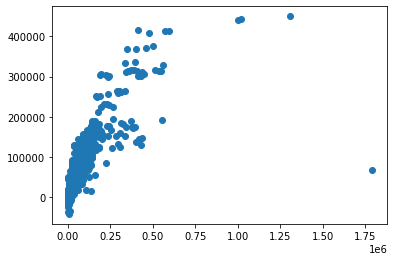

In [6]:
plt.scatter(y_test,lr.predict(X_test))

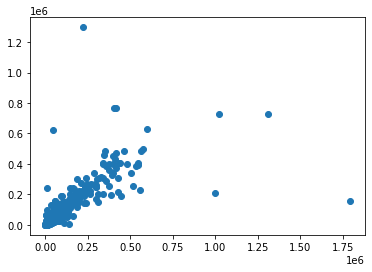

In [7]:
plt.scatter(y_test,dt.predict(X_test))

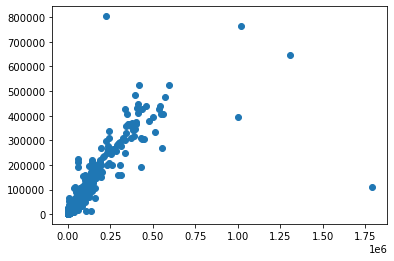

In [8]:
plt.scatter(y_test,rf.predict(X_test))

## K Fold Cross Validation

In [9]:
from sklearn.model_selection import cross_val_score


In [10]:
for model in [lr, dt, rf]:
    
    results = cross_val_score(model, X_train, y_train, cv=5)
    
    print("\n" + str(model) + f"\n Cross Val Score {np.mean(results)}" + f"\n Std {np.std(results)}" + f"\n Results {results}")


LinearRegression()
 Cross Val Score 0.7613030038830673
 Std 0.062384271605662484
 Results [0.78820426 0.75048999 0.80544721 0.81737176 0.64500179]

DecisionTreeRegressor()
 Cross Val Score 0.8118144775611814
 Std 0.028060704610965423
 Results [0.84504026 0.76593387 0.79827616 0.8148685  0.83495361]

RandomForestRegressor()
 Cross Val Score 0.8612597891905247
 Std 0.03289207473398755
 Results [0.88919352 0.81568836 0.86987255 0.90068279 0.83086173]


Pros

* Estimation of variance of our model
* Better use of data

Cons

* Computational cost

In [11]:
# Models for this study
models = []
models.append(('lr', LinearRegression()))
models.append(('dt', DecisionTreeRegressor()))
models.append(('rf', RandomForestRegressor()))



# Defining columns
names = []
results = []
minimums = []
means = []
stds = []
maximums = []

scoring = 'r2'

# Defining the algorithm function
def cross_val_algorithm(name, model):
    '''
    Function that runs the cross-validation (CV) for the named algorithm
    - name: Designation of the algorithm. 
    - model: Algorithm to be applied.
    '''
    kfold = model_selection.KFold(n_splits=5, shuffle=True)
    cv_results = model_selection.cross_val_score(estimator=model,
                                                 X=X,
                                                 y=y,
                                                 cv=kfold,
                                                 scoring=scoring)
    
    # Appending each iteration to the lists created above
    names.append(name)
    results.append(cv_results)
    minimums.append(cv_results.min())
    means.append(cv_results.mean())
    stds.append(cv_results.std())
    maximums.append(cv_results.max())

# Running the algorithm for each model in the list designated
for name, model in models:

    cross_val_algorithm(name, model)

# Creating a DataFrame :
models_df = pd.DataFrame({'model': names,
                          'minimum_r2': minimums,
                          'mean_r2': means,
                          'maximum_r2': maximums,
                          'std_r2': stds})


models_df 



,model,minimum_r2,mean_r2,maximum_r2,std_r2
0,lr,0.600351,0.727323,0.796046,0.078021
1,dt,0.407701,0.720416,0.859377,0.165024
2,rf,0.707168,0.832599,0.885023,0.065692


In [12]:
import seaborn as sns

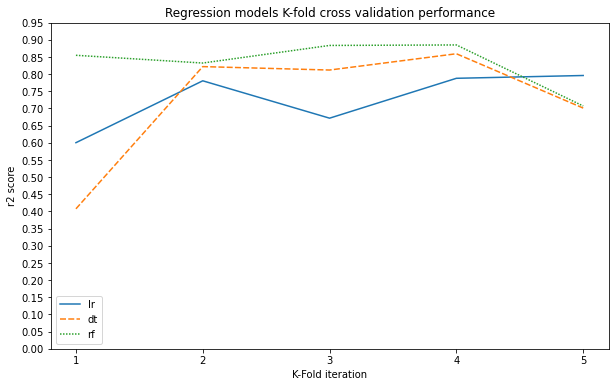

In [22]:
plt.figure(figsize=(10, 6))

sns.lineplot(data=results, dashes=True)

plt.title('Regression models K-fold cross validation performance')
plt.xticks(list(range(0, 5)), list(range(1, 6)))
plt.xlabel('K-Fold iteration')
plt.yticks(np.arange(0, 1, .05))
plt.ylabel('r2 score')

plt.legend(names)


plt.show()

/var/folders/8d/r5dgt6bd65964tjj89vgvwh40000gn/T/ipykernel_33232/3574728069.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


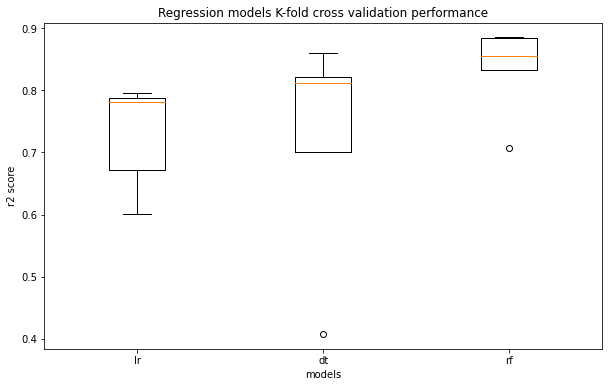

In [14]:
fig , ax1 = plt.subplots(figsize=(10,6))
ax1.set_title("Regression models K-fold cross validation performance")
ax1.set_xlabel('models') 
ax1.set_ylabel('r2 score') 
labels = names
ax1.boxplot(results) 
ax1.set_xticklabels(labels)

fig.show()

In [15]:
models_df.set_index('model', inplace = True)

(array([0, 1, 2]), [Text(0, 0, 'lr'), Text(1, 0, 'dt'), Text(2, 0, 'rf')])

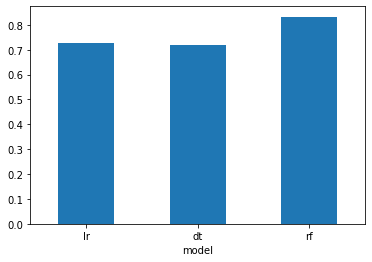

In [36]:
models_df["mean_r2"].plot(kind = "bar")
plt.xticks(rotation=0)



In [74]:
#Grid Search


In [42]:


from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [69]:
rf = RandomForestRegressor()
gs = model_selection.GridSearchCV(rf, {'max_depth': [1,2,3,4,5,7,10,15,20,40,100], 
                                        'min_samples_leaf' : [1,5,10,50,100,200,300,400,500]},
                                  scoring = 'r2', cv = 5, n_jobs=-1)

In [70]:
gs.fit(X_train[:,-1].reshape(-1,1), y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 7, 10, 15, 20, 40, 100],
                         'min_samples_leaf': [1, 5, 10, 50, 100, 200, 300, 400,
                                              500]},
             scoring='r2')

In [71]:
gs.best_params_

{'max_depth': 3, 'min_samples_leaf': 400}

In [72]:
pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.402143,0.009322,0.032140,0.003686,1,1,"{'max_depth': 1, 'min_samples_leaf': 1}",0.025962,0.035655,0.026342,0.027047,0.029483,0.028898,0.003594,92
1,0.402805,0.007508,0.029361,0.002644,1,5,"{'max_depth': 1, 'min_samples_leaf': 5}",0.026084,0.035192,0.026595,0.026745,0.029393,0.028802,0.003396,96
2,0.406473,0.006625,0.030104,0.002768,1,10,"{'max_depth': 1, 'min_samples_leaf': 10}",0.025852,0.035560,0.026233,0.026969,0.029456,0.028814,0.003599,95
3,0.408670,0.014822,0.034489,0.002752,1,50,"{'max_depth': 1, 'min_samples_leaf': 50}",0.025970,0.035156,0.026770,0.026739,0.029274,0.028782,0.003376,97
4,0.408316,0.010430,0.028786,0.005051,1,100,"{'max_depth': 1, 'min_samples_leaf': 100}",0.025732,0.035324,0.025894,0.027308,0.029158,0.028683,0.003541,99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0.658824,0.016629,0.052291,0.003825,100,100,"{'max_depth': 100, 'min_samples_leaf': 100}",0.030904,0.038446,0.027162,0.029877,0.033674,0.032013,0.003833,48
95,0.616967,0.008652,0.045469,0.003526,100,200,"{'max_depth': 100, 'min_samples_leaf': 200}",0.031032,0.038764,0.027225,0.030024,0.033915,0.032192,0.003921,28
96,0.636775,0.014886,0.048428,0.003373,100,300,"{'max_depth': 100, 'min_samples_leaf': 300}",0.031074,0.038682,0.027140,0.030026,0.033941,0.032173,0.003915,34
97,0.608426,0.016014,0.045322,0.005095,100,400,"{'max_depth': 100, 'min_samples_leaf': 400}",0.030949,0.038761,0.027275,0.030440,0.033645,0.032214,0.003848,21


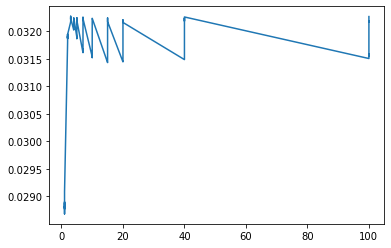

In [73]:
fig, ax = plt.subplots(1,1)
ax.plot(np.array(gs.cv_results_["param_max_depth"]), gs.cv_results_["mean_test_score"])